![](Logo3.png)

#  Regresión lineal simple en Python

## Tabla de Contenido

[1. Contexto de la práctica](#id1)<br>
[2. Evaluar dataset](#id2)<br>
[3. Determinar la correlación ](#id3)<br>
[4. Diagrama de dispersión](#id4)<br>
[5. Regresión lineal Simple](#id5)<br>
[6. Predicción](#id6)<br>

## Regresión lineal simple en Python

- En estadística, la regresión lineal es una forma de **modelar una relación entre variables dependientes y**  y **variables independientes x**.
- La idea principal de la regresión es **cuantificar la relación matemática** entre una o más **variables independientes** (también llamadas **predictores**) y una **variable dependiente** (también llamada objetivo). 
- Es un **método supervisado**, por lo que **depende de un conjunto de datos de valores obtenidos** de los predictores y del objetivo.
- Se puede **utilizar para calcular los valores de la variable dependiente fuera del alcance de los valores obtenidos**, es decir que un modelo de regresión permite que el analista **extrapole información fuera del conjunto de datos disponible**.
- Al trabajar con datos de **series de tiempo**, por ejemplo, **la regresión permite que el analista prediga los valores futuros a partir de datos históricos**.
- Un **alto porcentaje de correlación de Pearson indica que un modelo lineal simple es un buen candidato** para adaptarse a los datos.
- A pesar del nombre, **la regresión lineal no implica pasar una línea** a través de puntos de datos. 
- El término **lineal significa que la función de regresión intentará siempre adaptarse a los datos** mediante un promedio ponderado de otras funciones,
- El objetivo de la regresión es encontrar un modelo que describa los datos con la mayor precisión posible.

## 1. Contexto de la práctica    <a id='id1'> </a>

- En esta práctica de laboratorio se familiarizará con los **conceptos de la regresión lineal simple** y aprenderá a trabajar con datos  para **realizar una predicción**.
- Analizará  **datos de ventas**  y realizará una **regresión lineal simple para predecir las ventas netas anuales** según la cantidad de tiendas en el distrito.

## 2. Evaluar Dataset   <a id='id2'> </a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ventas = pd.read_csv('stores-dist.csv')
ventas.head(30)

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6
5,6,487.0,5
6,7,299.0,11
7,8,195.0,13
8,9,20.0,16
9,10,68.0,9


In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  27 non-null     int64  
 1   sales     27 non-null     float64
 2   stores    27 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 776.0 bytes


##  3. Determinar la correlación  <a id='id3'> </a>

- En este paso, investigará la conexión de los datos antes del análisis de regresión. 
- También descartará cualquier columna sin relación según sea necesario.

In [5]:
ventas.corr()

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


### Conclusiones de la correlación

- Según el coeficiente de correlación, parece que **la columna district (distrito) tiene correlación baja** con respecto a las ventas netas anuales (sales)  
- La columna del **distrito no es necesaria como parte del análisis de regresión**, por lo tanto **la columna district (distrito) se puede descartar** de la estructura de datos.  

  
  
- La correlación entre las **ventas netas anuales y el número de tiendas** en el distrito es **fuertemente negativa** como lo indica un coeficiente de **-0.906**. 
- Esperará ver una línea de regresión que desciende de izquierda a derecha.

In [6]:
# Borramos la columna distrito por ser irrelevante

ventas = ventas.drop('district',axis=1)
ventas.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


## 4. Diagrama de dispersión  <a id='id4'> </a>

- Para el gráfico de dispersión se asignará **tiendas como variable independiente  x**  y **ventas como variable dependiente  y**.

In [7]:
# Variable Independiente o variables predictoras (Eje)  X 
x = ventas.stores 

# Variable dependiente o variable objetivo (Eje)  y 
y = ventas['sales']

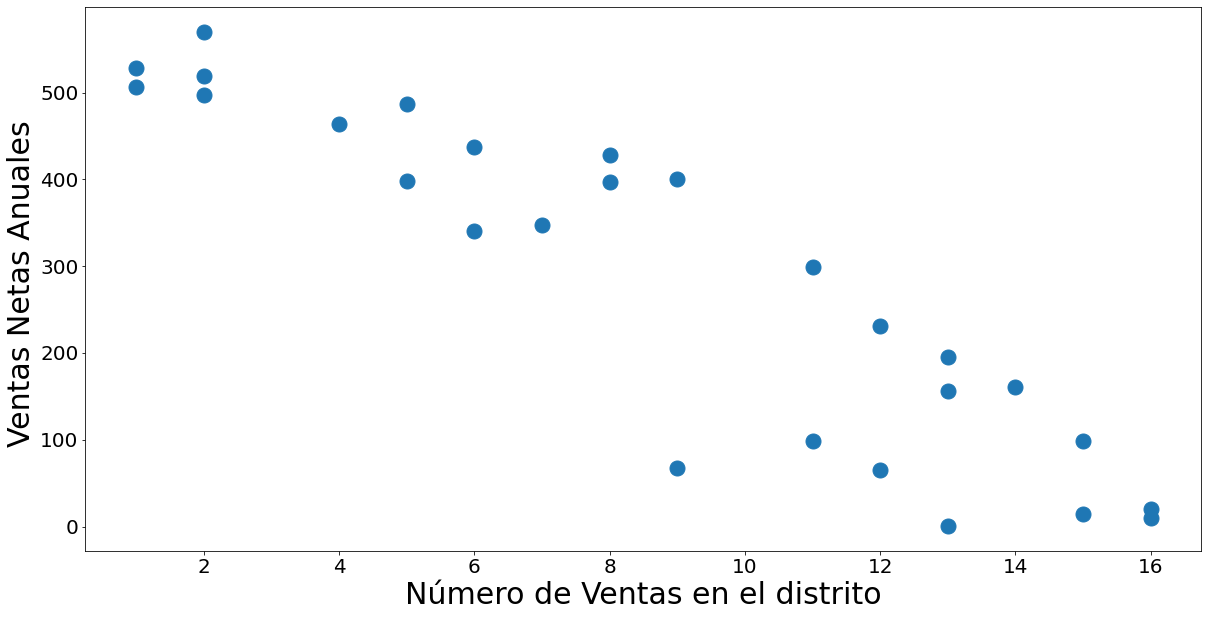

In [8]:
# Definir tamaño del grafico
plt.figure(figsize=(20,10))

# Diagrame de dispersion 
plt.plot(x,y, 'o', markersize = 15)

# Etiquetas de los ejes
plt.ylabel('Ventas Netas Anuales ', fontsize = 30)
plt.xlabel('Número de Ventas en el distrito', fontsize = 30)

# Incrementar el tamaño de los marcadores de los ejes
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Mostarr diagrama de dispersión
plt.show()

## 5. Regresión lineal Simple <a id='id5'> </a>

- En esta parte, usará numpy para generar una línea de regresión para los datos analizados. 
- También calculará el centroide para este conjunto de datos. 
- El centroide es **la media del conjunto de datos**.
- La línea de regresión lineal simple generada también debe pasar por el centroide.

### Calcular la pendiente y la intersección con el eje y de la línea de regresión lineal

In [9]:
# Usar polyfit numpy en la regresión lineal para ajustar los datos
# Generar la pendiente de la recta (m)
# Generar el intercepto en y (b)

m, b = np.polyfit(x, y, 1) 
print ('La pendiente es {:.2f}.'.format(m))
print ('El Intercepto y es {:.2f}.'.format(b))
print ('La línea de regresión lineal simple de mejor ajuste es {:.2f}x + {:.2f}.'.format(m,b))


La pendiente es -35.79.
El Intercepto y es 599.38.
La línea de regresión lineal simple de mejor ajuste es -35.79x + 599.38.


###   Calcular el centroide

In [10]:
# Coordenada y del centroide
y_mean = y.mean()    

# Coordenada x del centroide
x_mean = x.mean()

print ('El centroide es x = {:.2f} y  *y* = {:.2f}.'.format(x_mean, y_mean))

El centroide es x = 8.74 y  *y* = 286.57.


###  Colocar la línea de regresión y el punto centroide en el gráfico

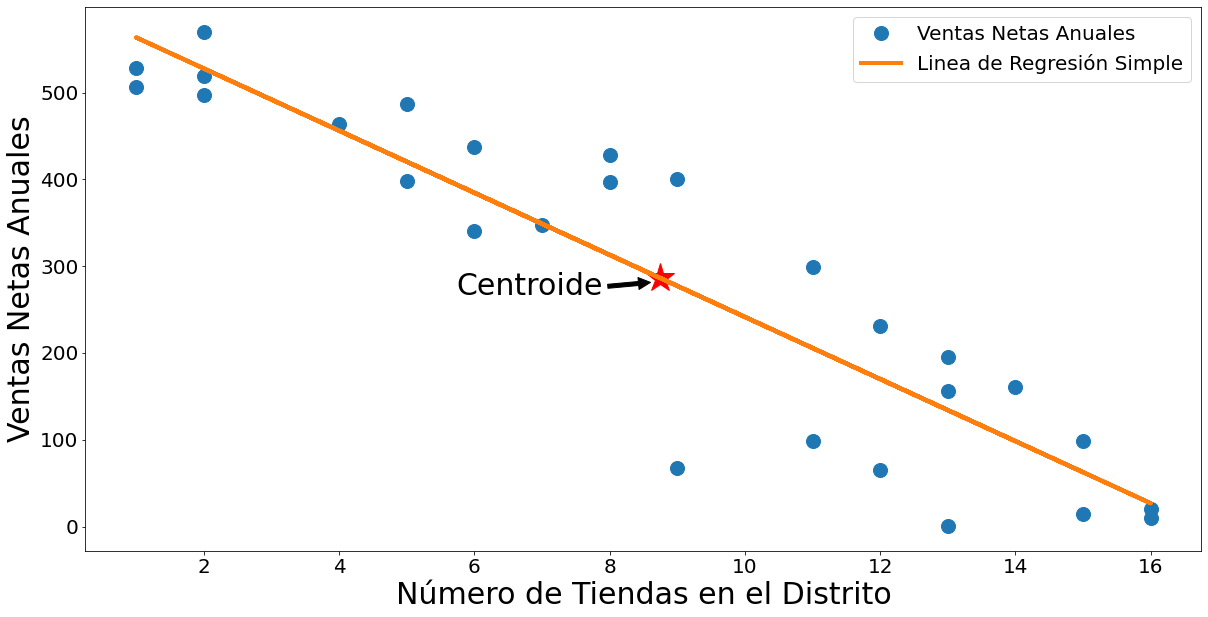

In [11]:
# Code Cell 10
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Ventas Netas Anuales") 

# Plot the centroid point
plt.plot(x_mean, y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Linea de Regresión Simple', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Ventas Netas Anuales', fontsize = 30)
plt.xlabel('Número de Tiendas en el Distrito', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroide', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

## 6. Predicción <a id='id6'> </a>

**Regresión lineal simple**  
La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

- El predictor/variable independiente (X)
- El objetivp/variable dependiente (que queremos predecir)(Y)
- El resultado de **la regresión lineal es una función lineal que predice la variable de respuesta** (dependiente) en función de la(s) variable(s) predictora(s) (independiente(s)).

**Función Lineal**
$$
Yhat = a + b  X
$$

- **a** se refiere a la intersección de la línea de regresión
- **b** se refiere a la pendiente de la línea de regresión  

- Formula:
    $$y = mx + b$$

In [24]:
# Funcion para predecir las ventas netas anuales 

def predecir(valordeX):
    if valordeX >= 1:
        prediccion = m * valordeX + b
        return prediccion
    else:
        print ("Debe tener al menos 1 tienda en el distrito para predecir las ventas netas anuales.")

In [25]:
# Ingresar el número de tiendas en la función para generar la predicción de ventas netas.

predecir(10)

241.50885534292138

In [26]:
predecir(4)

456.2313681207654

In [17]:
predecir(2)

527.8055390467134